## Find Data Availability for Stations

Find which RAWS stations in Colorado have data availability for variables of interest to fuel moisture model.

In [1]:
!pip install MesoPy
from MesoPy import Meso
import os.path as osp

outpath = "."

# bounding_box = "-115, 38, -110, 40"
meso_token="4192c18707b848299783d59a9317c6e1"
m=Meso(meso_token)

In [2]:
time_start = "201806010800"  # June 1 2018 08:00 in format yyyymmddHHMM
time_s2    = "201806010900"  # June 1 2018 09:00 in format yyyymmddHHMM 
time_end   = "201907200900"  # June 20 2018 09:00 in format yyyymmddHHMM

vars='air_temp,relative_humidity,precip_accum,fuel_moisture'

In [3]:
meso_obss = m.timeseries(time_start, time_s2, state="CO", 
                             showemptystations = '0', vars=vars)

In [4]:
import pandas as pd
import numpy as np

station_df = pd.DataFrame(columns=['STID', 'air_temp', 'relative_humidity', 'precip_accum', 'fuel_moisture'],
                  index=range(0, len(meso_obss["STATION"])))

In [5]:
for i in range(0, station_df.shape[0]):
    station_df["STID"][i] = meso_obss["STATION"][i]["STID"]
    station_df["air_temp"][i] = int("air_temp" in meso_obss["STATION"][i]["SENSOR_VARIABLES"].keys())
    station_df["relative_humidity"][i] = int("relative_humidity" in meso_obss["STATION"][i]["SENSOR_VARIABLES"].keys())
    station_df["precip_accum"][i] = int("precip_accum" in meso_obss["STATION"][i]["SENSOR_VARIABLES"].keys())
    station_df["fuel_moisture"][i] = int("fuel_moisture" in meso_obss["STATION"][i]["SENSOR_VARIABLES"].keys())

In [6]:
station_df[station_df["fuel_moisture"]==1].head()

,STID,air_temp,relative_humidity,precip_accum,fuel_moisture
123,CPTC2,1,1,1,1
124,CHAC2,1,1,1,1
125,CHRC2,1,1,1,1
144,LKGC2,1,1,1,1
149,CCEC2,1,1,1,1


In [7]:
# write output
station_df.to_csv(osp.join(outpath, 'station_df_co.csv'), index=False)

## Plot Timeseries for a Station

Visualize the available data.

In [8]:
meso_ts = m.timeseries(time_start, time_end, stid="CPTC2", showemptystations = '0', vars=vars)   # ask the object for data

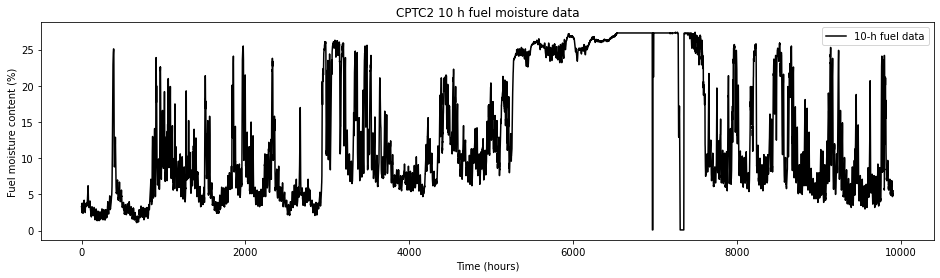

In [9]:
from datetime import datetime, timedelta, time
import numpy as np
import matplotlib.pyplot as plt
import pytz
station = meso_ts['STATION'][0]
time_str  = station['OBSERVATIONS']['date_time']
obs_time = [datetime.strptime(t, '%Y-%m-%dT%H:%M:%SZ').replace(tzinfo=pytz.UTC) for t in time_str]
start_time = obs_time[0].replace(minute=0)     # remember obs_time and start_time for later
end_time = obs_time[-1]
obs_data = np.array(station['OBSERVATIONS']["fuel_moisture_set_1"])


%matplotlib inline
plt.figure(figsize=(16,4))
plt.plot(obs_data,linestyle='-',c='k',label='10-h fuel data')
plt.title(station['STID'] + ' 10 h fuel moisture data')
plt.xlabel('Time (hours)') 
plt.ylabel('Fuel moisture content (%)')
plt.legend()

Text(0, 0.5, 'Relative Humidity (%)')

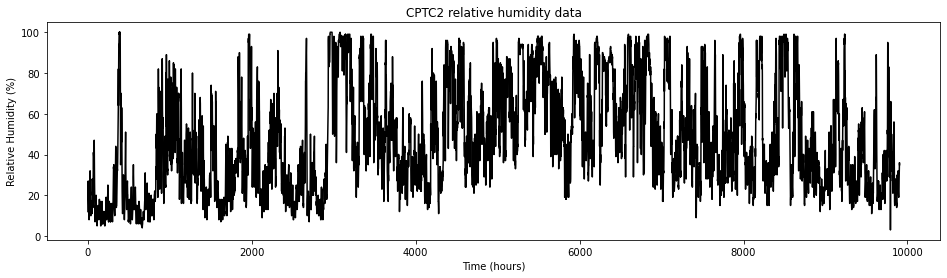

In [10]:
obs_data = np.array(station['OBSERVATIONS']["relative_humidity_set_1"])


%matplotlib inline
plt.figure(figsize=(16,4))
plt.plot(obs_data,linestyle='-',c='k')
plt.title(station['STID'] + ' relative humidity data')
plt.xlabel('Time (hours)') 
plt.ylabel('Relative Humidity (%)')

Text(0, 0.5, 'Precipitation Accumulated (mm)')

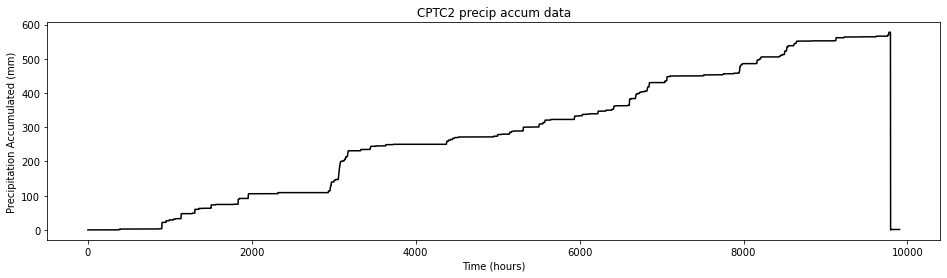

In [11]:
obs_data = np.array(station['OBSERVATIONS']["precip_accum_set_1"])


%matplotlib inline
plt.figure(figsize=(16,4))
plt.plot(obs_data,linestyle='-',c='k')
plt.title(station['STID'] + ' precip accum data')
plt.xlabel('Time (hours)') 
plt.ylabel('Precipitation Accumulated (mm)')

Text(0, 0.5, 'Air Temp (C)')

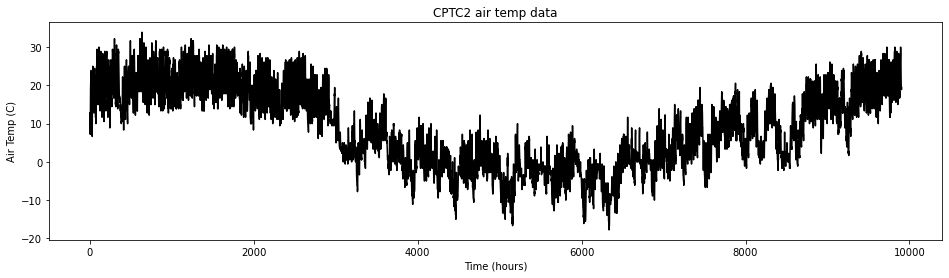

In [12]:
obs_data = np.array(station['OBSERVATIONS']["air_temp_set_1"])


%matplotlib inline
plt.figure(figsize=(16,4))
plt.plot(obs_data,linestyle='-',c='k')
plt.title(station['STID'] + ' air temp data')
plt.xlabel('Time (hours)') 
plt.ylabel('Air Temp (C)')